In [2]:
import numpy as np 
import scipy.signal
import matplotlib.pyplot as plt

from pfb_channelizer import load_dump_data, process_header

header_size = 4096
float_dtype = np.float32

In [44]:
# simulated_pulsar_pre_fold_dump_file = "simulated_pre_Fold.dump"
# py_channelized_pre_fold_dump_file = "py_channelized_pre_Fold.dump"
operation = "Fold"
operation = "Detection"
fnames = [f"simulated_pre_{operation}.dump", f"py_channelized.conv._pre_{operation}.dump"]

# fnames = [simulated_pulsar_pre_fold_dump_file, py_channelized_pre_fold_dump_file]

dsets = []

for fname in fnames:
    dset = load_dump_data(fname)
    dset[0] = process_header(dset[0])
    dset[1] = dset[1].reshape((-1, 2, 2))
    dset[1] = dset[1][:,:,0] + 1j*dset[1][:,:,1]
    dsets.append(dset)

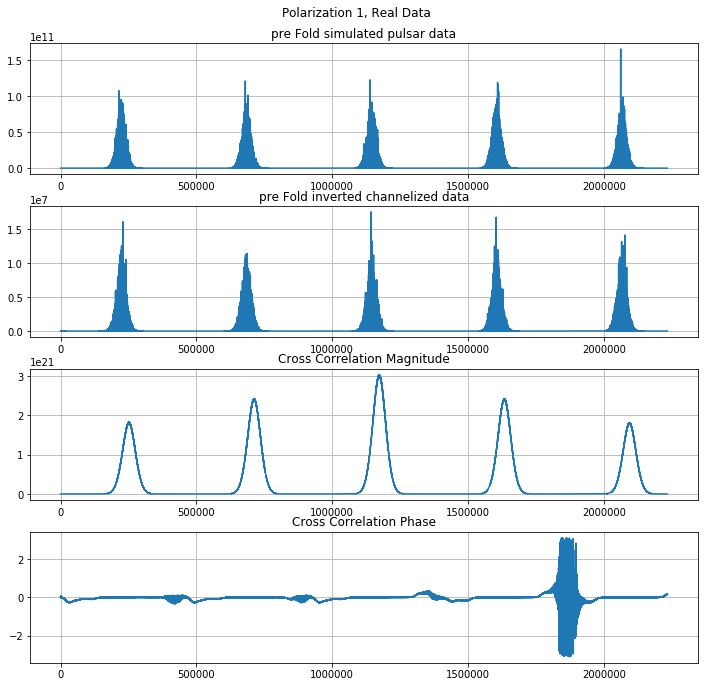

In [46]:
fig, axes = plt.subplots(4,1,figsize=(10,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

z_map = {
    0: {"text":"Real", "fn": np.real},
    1: {"text":"Complex", "fn":np.imag}
};

ipol = 0
z = 0

fig.suptitle(f"Polarization {ipol + 1}, {z_map[z]['text']} Data");

idx = ipol*2 + z

s_dat = dsets[0][1][:,ipol]
c_dat = dsets[1][1][:,ipol]

min_shape = np.amin([s_dat.shape[0], c_dat.shape[0]])

axes[0].plot(np.abs(s_dat))
axes[0].grid(True)
axes[0].set_title(f"pre {operation} simulated pulsar data")

axes[1].plot(np.abs(c_dat))
axes[1].set_title(f"pre {operation} inverted channelized data")
axes[1].grid(True)

x_corr = scipy.signal.fftconvolve(s_dat, np.conj(c_dat), mode="same")
# x_corr_norm = x_corr / np.sum(x_corr)

axes[2].plot(np.abs(x_corr))
axes[2].set_title(f"Cross Correlation Magnitude")
axes[2].grid(True)

axes[3].plot(np.angle(x_corr))
axes[3].set_title(f"Cross Correlation Phase")
axes[3].grid(True)

# axes[1,1].plot((s_dat[:min_shape] - c_dat[:min_shape])**2)
# axes[1,1].set_title(f"Cross Correlation of Polarization {ipol + 1}, {z_map[z]} data")
# axes[1,1].grid(True)


### Read in diff text file and plot